In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Reshape, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from PIL import Image 
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/modelsudokuver4/sudoku_0.98.h5
/kaggle/input/sudoku/sudoku.csv


In [3]:
df = pd.read_csv('../input/sudoku/sudoku.csv')
df.head()

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...


In [4]:
X = np.array(df.quizzes.map(lambda x: list(map(int, x))).to_list())
Y = np.array(df.solutions.map(lambda x: list(map(int, x))).to_list())

In [5]:
X.shape, Y.shape

((1000000, 81), (1000000, 81))

In [6]:
X = X.reshape(-1, 9, 9, 1)
Y = Y.reshape(-1, 9, 9) - 1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [8]:
X_train.shape

(800000, 9, 9, 1)

In [9]:
model = Sequential()
model.add(Conv2D(128, 3, activation='relu', padding='same', input_shape=(9,9,1)))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(1024, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(9, 1, activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(512))
model.add(Dense(81*9))
model.add(tf.keras.layers.LayerNormalization(axis=-1))
model.add(Reshape((9, 9, 9)))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
                optimizer=Adam(
                learning_rate=0.001
    ),
    metrics=['accuracy'])
model.summary()
# history = model.fit(X_train, y_train, batch_size = 32, epochs = 100,validation_data=(X_test, y_test))

2022-10-08 04:42:36.747462: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-08 04:42:36.919697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-08 04:42:36.920533: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-08 04:42:36.922325: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 9, 128)         1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 9, 9, 128)         512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 128)         147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 9, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         5

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [10]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 100,validation_data=(X_test, y_test), callbacks=[callback])

2022-10-07 16:02:47.998475: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-07 16:02:49.790886: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


12500/12500 [==============================] - 414s 32ms/step - loss: 0.5660 - accuracy: 0.7951 - val_loss: 0.2824 - val_accuracy: 0.8963
Epoch 2/100
12500/12500 [==============================] - 392s 31ms/step - loss: 0.2255 - accuracy: 0.9176 - val_loss: 0.1919 - val_accuracy: 0.9303
Epoch 3/100
12500/12500 [==============================] - 391s 31ms/step - loss: 0.1623 - accuracy: 0.9412 - val_loss: 0.1522 - val_accuracy: 0.9448
Epoch 4/100
12500/12500 [==============================] - 404s 32ms/step - loss: 0.1315 - accuracy: 0.9525 - val_loss: 0.1338 - val_accuracy: 0.9517
Epoch 5/100
12500/12500 [==============================] - 405s 32ms/step - loss: 0.1128 - accuracy: 0.9592 - val_loss: 0.1226 - val_accuracy: 0.9559
Epoch 6/100
12500/12500 [==============================] - 404s 32ms/step - loss: 0.0996 - accuracy: 0.9640 - val_loss: 0.1151 - val_accuracy: 0.9588
Epoch 7/100
12500/12500 [==============================] - 391s 31ms/step - loss: 0.0893 - accuracy: 0.9678 - va

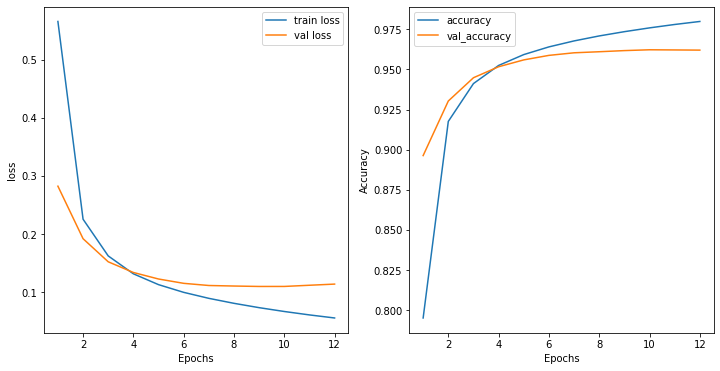

In [13]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,6)
e = [i for i in range(1, 13)]
ax[0].plot(e, history.history['loss'], label='train loss')
ax[0].plot(e, history.history['val_loss'], label='val loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("loss")

ax[1].plot(e, history.history['accuracy'], label='accuracy')
ax[1].plot(e, history.history['val_accuracy'], label='val_accuracy')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.show()

In [14]:
model.evaluate(X_test, y_test)

6250/6250 [==============================] - 47s 7ms/step - loss: 0.1138 - accuracy: 0.9620


[0.11378929018974304, 0.9620296359062195]

In [15]:
# model.save('model_norm.h5')

In [10]:
model = keras.models.load_model('../input/modelsudokuver4/sudoku_0.98.h5')

In [26]:
inp = X_train[1].reshape((9, 9)).astype(int)
inp

array([[0, 4, 6, 5, 0, 0, 1, 0, 0],
       [7, 0, 2, 3, 0, 0, 0, 0, 5],
       [0, 1, 0, 0, 8, 0, 2, 0, 0],
       [0, 8, 0, 0, 3, 0, 7, 4, 0],
       [3, 0, 9, 1, 6, 0, 0, 0, 0],
       [0, 5, 0, 0, 7, 0, 0, 6, 0],
       [0, 0, 0, 9, 2, 0, 8, 0, 7],
       [0, 3, 0, 0, 0, 6, 0, 5, 2],
       [1, 0, 0, 4, 0, 8, 9, 0, 0]])

In [27]:
y_ = y_train[1]+1

In [28]:
y_

array([[8, 4, 6, 5, 9, 2, 1, 7, 3],
       [7, 9, 2, 3, 4, 1, 6, 8, 5],
       [5, 1, 3, 6, 8, 7, 2, 9, 4],
       [6, 8, 1, 2, 3, 5, 7, 4, 9],
       [3, 7, 9, 1, 6, 4, 5, 2, 8],
       [2, 5, 4, 8, 7, 9, 3, 6, 1],
       [4, 6, 5, 9, 2, 3, 8, 1, 7],
       [9, 3, 8, 7, 1, 6, 4, 5, 2],
       [1, 2, 7, 4, 5, 8, 9, 3, 6]])

In [29]:
pre = model.predict(inp.reshape(1, 9, 9, 1)).argmax(-1).squeeze()+1

In [30]:
model.predict(inp.reshape(1, 9, 9, 1)).argmax(-1).squeeze()+1

array([[8, 4, 6, 5, 9, 2, 1, 7, 3],
       [7, 9, 2, 3, 4, 1, 6, 8, 5],
       [5, 1, 3, 6, 8, 7, 2, 9, 4],
       [6, 8, 1, 2, 3, 5, 7, 4, 9],
       [3, 7, 9, 1, 6, 4, 5, 2, 8],
       [2, 5, 4, 8, 7, 9, 3, 6, 1],
       [4, 6, 5, 9, 2, 3, 8, 1, 7],
       [9, 3, 8, 7, 1, 6, 4, 5, 2],
       [1, 2, 7, 4, 5, 8, 9, 3, 6]])

In [31]:
np.sum(y_ - pre)

0